# Data Cleaning

**Important Note:** The slides in the deck have modified versions of the dataset to illustrate and provide examples for various errors to clean. The real dataset for this project may not have the same errors, so don't expect to find the exact same observations as in the slides.

In [1]:
# First import the libraries you'll need
import pandas as pd
pd.set_option('display.max_columns', 100)

import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
# import the dataset
df = pd.read_csv('real_estate.csv')
df.head(2)

,price,year_sold,property_tax,insurance,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,entertainment,sports,median_age,married,college_grad,num_schools,property_type,exterior_walls,roof
0,295850,2013,234,81,1,1,584,2013,0,NaN,107,9,30,19,89,6,58,33,65,84,3,Apartment / Condo / Townhouse,Wood Siding,NaN
1,216500,2006,169,51,1,1,612,1965,0,1.0,105,15,6,13,87,2,14,39,73,69,3,Apartment / Condo / Townhouse,Brick,Composition Shingle


#### Now let's get started with cleaning the data!

The first step to data cleaning is removing records from your dataset that you don't want to include in the model. This includes **duplicate observations** and **irrelevant observations.**

## I. Drop Unwanted Observations

**Duplicate observations are repeating observations.**
* They occur when combining multiple datasets, scraping data, or collecting data from different clients.

* Dropping duplicates is easy using Pandas's built-in `drop_duplicates()` function.

In [4]:
# check the shape of the data before
print(df.shape)

# Drop duplicates
df = df.drop_duplicates()
print(df.shape)

(1883, 24)
(1883, 24)


#### Were there any duplicates?

## II. Fix Structural Errors

* Structural errors are those that arise during measurement, data transfer, etc.
* For example, the `basement` feature? It has values **1** and **NaN**.

In [5]:
# Display unique values of 'basement'
print(df.basement.unique())

[nan  1.]


The **NaN** values are missing values. They actually indicate that the property does not have a `basement`. Therefore, let's replace them with the value **0**.

Using the `.fillna()` function replace **NaN** values with 0. 

In [6]:
# Replace missing basement values to 0
# inplace=True updates the values in the original DataFrame.
df.basement.fillna(0, inplace=True)

In [11]:
# Display unique values of 'basement'
print(df.basement.unique())

[0. 1.]


#### Next, check for typos or inconsistent capitalization in the categorical features.

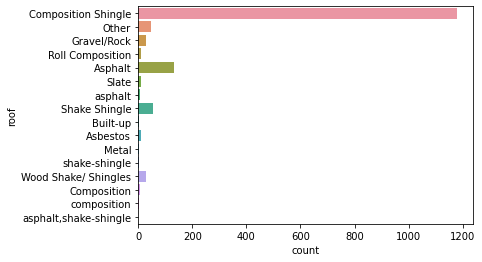

In [12]:
# Class distributions for 'roof'
sns.countplot(y='roof', data=df)
plt.show()

Note:
* <code style="color:crimson">'composition'</code>
should be `'Composition'`
* <code style="color:crimson">'asphalt'</code> should be `'Asphalt'`
* <code style="color:crimson">'shake-shingle'</code> & <code style="color:crimson">'asphalt,shake-shingle'</code> should be `'Shake Shingle'`


Use the `.replace()` function:
* The first argument is the class to replace. This can be a list of classes.
* The second argument is the new class label.
* Again, use inplace=True.

In [13]:
# 'composition' should be 'Composition'
df.roof.replace('composition', 'Composition', inplace=True)

# 'asphalt' should be 'Asphalt'
df.roof.replace('asphalt', 'Asphalt', inplace=True)

# 'shake-shingle' and 'asphalt,shake-shingle' should be 'Shake Shingle'
df.roof.replace(['shake-shingle', 'asphalt,shake-shingle'], 'Shake Shingle',
                inplace=True)

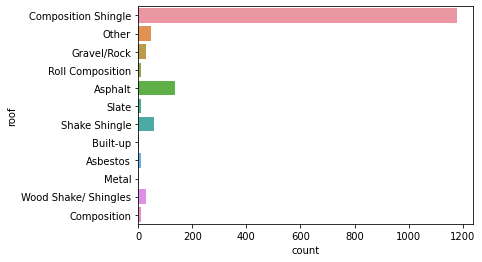

In [14]:
# Class distributions for 'roof'
sns.countplot(y='roof', data=df)
plt.show()

#### Next, check for mislabed classes in the 'exterior_walls' and make any necessary fixes.

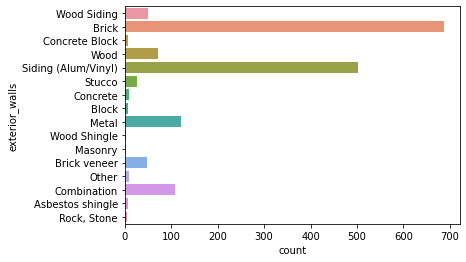

In [15]:
# Class distributions for 'exterior_walls'
sns.countplot(y='exterior_walls', data=df)
plt.show()

* <code style="color:crimson">'Rock, Stone'</code> should be `'Masonry'`
* <code style="color:crimson">'Concrete'</code> and <code style="color:crimson">'Block'</code> should both be `'Concrete Block'`

#### A. First, replace any instances of <code style="color:steelblue">'Rock, Stone'</code> with <code style="color:steelblue">'Masonry'</code> instead.
* Remember to do it "inplace."

In [21]:
# 'Rock, Stone' should be 'Masonry'
df.exterior_walls.replace('Rock, Stone', 'Masonry', inplace=True)

#### B. Next, replace any instances of <code style="color:steelblue">'Concrete'</code> or <code style="color:steelblue">'Block'</code> with <code style="color:steelblue">'Concrete Block'</code> instead.
* Remember to do it "inplace."

In [ ]:
# 'Concrete' and 'Block' should be 'Concrete Block'
df.exterior_walls.replace(['Concrete', 'Block'], 'Concrete Block', inplace=True)

#### C. Now plot the bar plot of <code style="color:steelblue">'exterior_walls'</code> to see its new distribution.

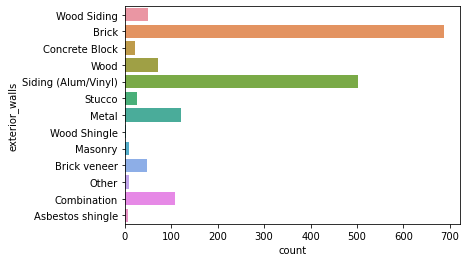

In [17]:
# Class distributions for 'exterior_walls'
sns.countplot(y='exterior_walls', data=df)
plt.show()

## III. Remove "Guilty" Outliers

Outliers can cause problems with certain types of models. For example, linear regression models are less robust to outliers than decision tree models. If you have a good reason to remove an outlier, it will help your model's performance.

#### A. Plot the violin plots for <code style="color:steelblue">'beds'</code>, <code style="color:steelblue">'sqft'</code>, and <code style="color:steelblue">'lot_size'</code>.
* **Tip:** If you want to plot multiple charts in the same code cell, remember to separate them by <code style="color:steelblue">plt.show()</code>, or else they will overlap.
* Among those features, do any look like they have potential outliers?

In [26]:
import warnings
warnings.filterwarnings('ignore')

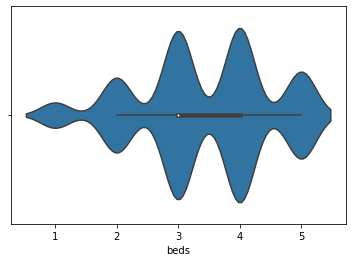

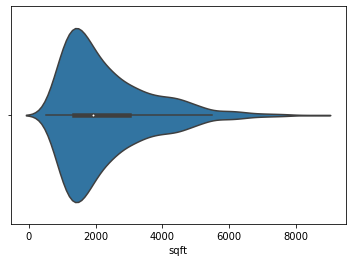

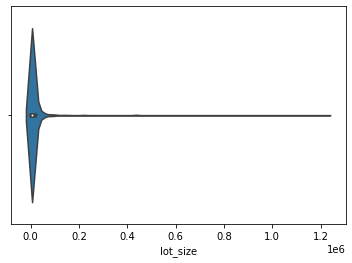

In [27]:
# Violin plot of beds
sns.violinplot(df.beds, data=df)
plt.show()

# Violin plot of sqft
sns.violinplot(df.sqft, data=df)
plt.show()


# Violin plot of lot_size
sns.violinplot(df.lot_size, data=df)
plt.show()

Among those three features, it looks like <code style="color:steelblue">lot_size</code> has a potential outlier! Look at its long and skinny tail. Let's look at the largest 5 lot sizes just to confirm.

#### B. Sort <code style="color:steelblue">df.lot_size</code> and display the top 5 samples.
* You can sort a Series with the <code style="color:steelblue">.sort_values()</code> function.
* **Tip:** <code style="color:steelblue">.sort_values()</code> has an argument called <code style="color:steelblue">ascending=</code>. By default, it's <code style="color:steelblue">True</code>
* **Tip:** You can chain functions together. This exercise can be completed in 1 line of code.

In [36]:
# Print top 5 homes with largest lot_size
df.lot_size.sort_values(ascending=False).head()

102     1220551
1111     436471
1832     436035
1876     436035
1839     435600
Name: lot_size, dtype: int64

The largest property has a lot_size of 1,220,551 sqft. The next largest has a lot_size of only 436,471 sqft.

#### C. Display the entire row for that observation with the huge lot size.
* How many bedrooms and bathrooms does the property have?
* What's its property type?
* What's its transaction price?
* **Do you think this observation could be an outlier? Why?**

In [37]:
# print the record where lot_size = 1220551
df[df.lot_size == 1220551]

,price,year_sold,property_tax,insurance,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,entertainment,sports,median_age,married,college_grad,num_schools,property_type,exterior_walls,roof
102,292999,2014,230,79,2,1,875,1950,1220551,0.0,63,11,11,8,39,18,44,33,35,87,3,Apartment / Condo / Townhouse,Brick,Missing


#### D.) Since all of the other observations are below 500,000 sqft, let's remove observations with <code style="color:steelblue">lot_size</code> greater than 500,000 sqft.
* You can use a boolean mask to do so (filter to keep only wanted observations).
* Overwrite the existing <code style="color:steelblue">df</code> object
* Print the length of the new <code style="color:steelblue">df</code> object.

In [38]:
# check df shape before
print(df.shape)

# Remove records with lot_size > 500,000
df = df[df.lot_size <= 500000]

# check df shape after
print(df.shape)

(1882, 24)

## IV. Handle Missing Data

#### First, let's find and count the missing categorical data.

You can do it in one line of code:

* First, select a subset of the DataFrame of only categorical features

<code style="color:blue">df.select_dtypes(include=['object'])</code>`.isnull().sum()`

* Then, flag all the values that are missing.

`df.select_dtypes(include=['object'])`<code style="color:blue">.isnull()</code>`.sum()`

* Finally, take the sum by column.

`df.select_dtypes(include=['object']).isnull()`<code style="color:blue">.sum()</code>

In [32]:
# Display number of missing values by feature (categorical)
df.select_dtypes(include=['object']).isnull().sum()

property_type     0
exterior_walls    0
roof              0
dtype: int64

**Label missing categorical values as 'Missing'**
* The best way to handle missing data for categorical features is to simply label them as `'Missing'`
<br><br>
* We can do so with the `.fillna()` function (remember to pass inplace = True)

In [29]:
# Fill missing values in exterior_walls with 'Missing'
df['exterior_walls'].fillna('Missing', inplace=True)

#### Go ahead and fill the missing values in `roof`

In [31]:
# Fill missing values in roof with 'Missing'
df['roof'].fillna('Missing', inplace=True)

#### Find and count if there are any missing values in the numerical features.

In [33]:
# find and count missing values in numerical features
df.select_dtypes(exclude=['object']).isnull().sum()

price            0
year_sold        0
property_tax     0
insurance        0
beds             0
baths            0
sqft             0
year_built       0
lot_size         0
basement         0
restaurants      0
groceries        0
nightlife        0
cafes            0
shopping         0
entertainment    0
sports           0
median_age       0
married          0
college_grad     0
num_schools      0
dtype: int64

## Save the Cleaned Dataset

#### Finally, save the cleaned dataframe as  <code style="color:steelblue">'cleaned_df.csv'</code>

Before we move on to the next module, let's save the new dataframe we worked hard to clean.
* We'll use Pandas's <code style="color:steelblue">.to_csv()</code> function.
* Set <code style="color:steelblue">index=<span style="color:crimson">None</span></code> so that Pandas drops the indices and only stores the actual data in the CSV.

In [ ]:
# Save the cleaned dataset
df.to_csv('cleaned_df.csv')


We will use <code style="color:steelblue">'cleaned_df.csv'</code> in all the other modules!
In the next module, **Feature Engineering**, you'll use the cleaned dataset to create new features that will improve model performance.